In [2]:
#다중선형회귀 실습
# 몸무게, 나이, 그리고 혈중 지방 함량이 제공되는데이터  
# 데이터의 수량이 작고, 분산값이 크지만 선형성을 보이고 있음
# 몸무게, 나이에 따른 혈중 지방 함량 예측
# Blood_fat.csv 라는 이름으로 data 제공
# 25명의 data로 84, 46, 354 형태로 제공됨
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

#코랩은 코랩에 업로드한 주소 입력해야된다
data = np.loadtxt("/content/Blood_fat.csv", delimiter=",")
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y_data = [i[2] for i in data]

a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

y = a1*x1 + a2*x2 + b
rmse = tf.sqrt(tf.reduce_mean(tf.square( y - y_data )))#루트(평균(제곱(예측값-실제값)))
learning_rate = 0.001
result = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)#경사하강법의 오차를 최소화하는 방향으로 검사

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(result)
        if step%100 == 0:
            print("epoch = %.f, rmse = %.4f, 기울기 a1 = %.4f, 기울기 a2 = %.4f, 절편 b = %.4f"
                  %(step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)))
        if step == 2000:    #epoch-1 즉, 마지막
            #2개의 기울기와 절편을 텐서에서 변수에 할당
            da1 = sess.run(a1)
            da2 = sess.run(a2)
            db = sess.run(b)
            print(da1)
            print(da2)
            print(db)
            print(type(da1))

epoch = 0, rmse = 643.9146, 기울기 a1 = 7.9995, 기울기 a2 = 8.0295, 절편 b = 80.6891
epoch = 100, rmse = 51.0198, 기울기 a1 = 1.2999, 기울기 a2 = 4.2778, 절편 b = 80.5946
epoch = 200, rmse = 42.6573, 기울기 a1 = 0.8654, 기울기 a2 = 4.3693, 절편 b = 80.5900
epoch = 300, rmse = 42.1239, 기울기 a1 = 0.7509, 기울기 a2 = 4.5693, 절편 b = 80.5895
epoch = 400, rmse = 41.8101, 기울기 a1 = 0.6632, 기울기 a2 = 4.7227, 절편 b = 80.5890
epoch = 500, rmse = 41.6278, 기울기 a1 = 0.5962, 기울기 a2 = 4.8396, 절편 b = 80.5887
epoch = 600, rmse = 41.5226, 기울기 a1 = 0.5454, 기울기 a2 = 4.9284, 절편 b = 80.5883
epoch = 700, rmse = 41.4623, 기울기 a1 = 0.5069, 기울기 a2 = 4.9956, 절편 b = 80.5880
epoch = 800, rmse = 41.4277, 기울기 a1 = 0.4778, 기울기 a2 = 5.0465, 절편 b = 80.5878
epoch = 900, rmse = 41.4080, 기울기 a1 = 0.4558, 기울기 a2 = 5.0850, 절편 b = 80.5875
epoch = 1000, rmse = 41.3967, 기울기 a1 = 0.4392, 기울기 a2 = 5.1141, 절편 b = 80.5873
epoch = 1100, rmse = 41.3902, 기울기 a1 = 0.4266, 기울기 a2 = 5.1361, 절편 b = 80.5871
epoch = 1200, rmse = 41.3865, 기울기 a1 = 0.4171, 기울기 a2 = 5.1527,

In [3]:
#위의 식에서 각 데이터의 예측값 출력
calc_y = []
for i in range(25):
  new_y = (da1*x1[i]) + (da2*x2[i]) + db  #y = a1x1 + a2x2 + b, 변수 이름은 위에서 선언했다
  calc_y.append(new_y)
  print(new_y)

[352.54828853]
[213.08735745]
[376.31344802]
[263.90008982]
[406.60533742]
[237.516619]
[250.76714524]
[295.8729283]
[407.77786299]
[338.63366023]
[215.90273523]
[276.52461089]
[376.31344802]
[222.42946513]
[415.55660324]
[357.08271227]
[280.78577444]
[376.58670822]
[369.824815]
[289.38429528]
[342.77724212]
[226.33788369]
[306.15239823]
[310.02271992]
[261.16419683]


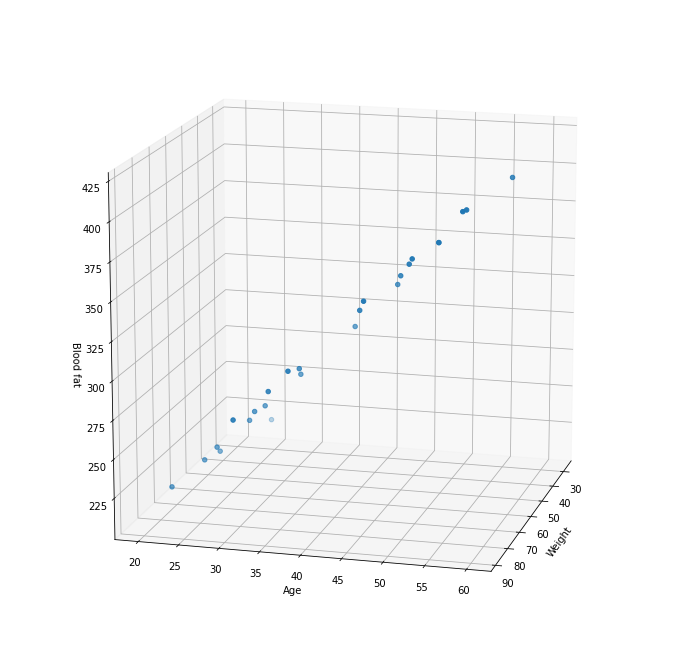

In [4]:
#결과 확인을 위해 그래프 작성
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#graph view
#figure(그래프가 그려지는 객체)생성
fig = plt.figure(figsize=(12,12))

#전체 공간을 1+1로 잡은 중 첫번째, 3d로 표시, 전체 공간을 나누는 개념
ax = fig.add_subplot(111, projection='3d')

#산점도 플롯을 만듬
#ax.scatter(x1, x2, y_data)    #실제값 그래프로 표현
ax.scatter(x1, x2 ,calc_y)    #3차원 상에서 점이 일렬로 나온다. 예측값이니까
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)    #표고와 방위각 지정(3D 그래프의 보이는 방향) <- 이 코드를 이용해서 보는 각도를 바꾼다
plt.show()
#garph view-end

In [8]:
#로지스틱 회귀
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

#x, y의 데이터 값
data = [[2,0], [4,0], [6,0], [8,1], [10,1], [12,1], [14,1]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

#a와 b의 값을 임의로 정한다
a = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))

#y 시그모이드 함수의 방정식을 세운다(예측값)
y = 1 / (1 + np.e ** -(a * x_data + b))

#loss를 구하는 함수(예측치와 실제값을 넣었을 때 오차함수)
loss = -tf.reduce_mean(np.array(y_data) * tf.log(y) + (1 - np.array(y_data)) * tf.log(1 - y))

#학습률 값
learning_rate = 0.5

#loss를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

#학습
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(60001):
    sess.run(gradient_decent)
    if i%6000 == 0:
      print("Epoch: %.f, loss = %.4f, 기울기 a = %.4f, y절편 = %.4f" %(i, sess.run(loss), sess.run(a), sess.run(b)))
    
    #다른값 확인해보기(5, 7, 13)
    if i ==60000:
      new_x_data = 5
      y_test = 1 / (1+np.e**-((a*new_x_data)+b))
      print(sess.run(y_test))
      print(sess.run(y_test[0]))
      
      new_x_data = 7
      y_test = 1 / (1+np.e**-((a*new_x_data)+b))
      print(sess.run(y_test))
      print(sess.run(y_test[0]))
      
      new_x_data = 13
      y_test = 1 / (1+np.e**-((a*new_x_data)+b))
      print(sess.run(y_test))
      print(sess.run(y_test[0]))

    #위의것과 다른 방식으로 만들기
    #이 밑은 다음 문단에서 쓰기 위해 선언한거다. calc를 run하려면 session안에서 해야되기 때문에
    calc_a = sess.run(a)
    calc_b = sess.run(b)

Epoch: 0, loss = 4.0817, 기울기 a = 2.4706, y절편 = -0.3620
Epoch: 6000, loss = 0.0152, 기울기 a = 2.9230, y절편 = -20.3114
Epoch: 12000, loss = 0.0081, 기울기 a = 3.5648, y절편 = -24.8081
Epoch: 18000, loss = 0.0055, 기울기 a = 3.9564, y절편 = -27.5511
Epoch: 24000, loss = 0.0041, 기울기 a = 4.2385, y절편 = -29.5268
Epoch: 30000, loss = 0.0033, 기울기 a = 4.4590, y절편 = -31.0705
Epoch: 36000, loss = 0.0028, 기울기 a = 4.6399, y절편 = -32.3371
Epoch: 42000, loss = 0.0024, 기울기 a = 4.7933, y절편 = -33.4107
Epoch: 48000, loss = 0.0021, 기울기 a = 4.9263, y절편 = -34.3424
Epoch: 54000, loss = 0.0019, 기울기 a = 5.0439, y절편 = -35.1653
Epoch: 60000, loss = 0.0017, 기울기 a = 5.1491, y절편 = -35.9020
[3.88235158e-05]
3.882351579087269e-05
[0.53537986]
0.5353798637651421
[1.]
0.9999999999999669


In [9]:
#위의것 다른 방식으로 출력
def NewDataCalc(new_x_data):
  return 1 / (1+np.e**-((calc_a * new_x_data) + calc_b))
print(NewDataCalc(5))
print(NewDataCalc(7))
print(NewDataCalc(13))

[3.88235158e-05]
[0.53537986]
[1.]


In [11]:
#다중 로지스틱 회귀
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

#실행할 때마다 같은 결과를 출력하기 위한 seed값 설정
seed = 0
np.random.seed(seed)    #넘파이, 텐서플로우 seed값 초기화
tf.set_random_seed(seed)

#x, y의 데이터 값
x_data = np.array([[2,3], [4,3], [6,4], [8,6], [10,7], [12,8], [14,19]])
y_data = np.array([0,0,0,1,1,1,1]).reshape(7,1)    #가로 7, 세로 1로 만든다

#입력 값을 플레이스 홀더에 저장
X = tf.placeholder(tf.float64, shape=[None, 2]) #앞은 상관없고, 1차원 요소는 2개
Y = tf.placeholder(tf.float64, shape=[None, 1]) #앞은 상관없고, 1차원 요소는 1개

#기울기 a와 바이어스 b의 값을 임의로 정함
#a는 [2,1]이 형태를 가짐 a1, a2
a = tf.Variable(tf.random_uniform([2,1], dtype=tf.float64))
#[2,1]의미 : 들어오는 값은 2개, 나가는 값은 1개
b = tf.Variable(tf.random_uniform([1], dtype=tf.float64))

#y 시그모이드 함수의 방정식 세움
y = tf.sigmoid(tf.matmul(X,a) + b)

#오차를 구하는 함수
loss = -tf.reduce_mean(Y * tf.log(y) + (1 - Y) * tf.log(1 - y))

#학습률 값
learning_rate = 0.1

#오차를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

predicted = tf.cast(y>0.5, dtype=tf.float64) #y가 0.5보다 크면 1, 아니면 0(텐서플로우 cast연산자에 의해)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float64))
#텐서플로우의 평균(predicted와 Y가 같으면 1, 아니면 0인 값들의 평균)

#학습
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(3001):
    #플레이스 홀더가 있으면 feed_dict로 값을 넣어준다
    a_, b_, loss_, _ = sess.run([a, b, loss, gradient_decent], feed_dict={X:x_data, Y:y_data})
    if (i+1) % 300 == 0:
      print("step = %d, a1 = %.4f, a2 = %.4f, b = %.4f, loss = %.4f" %(i+1, a_[0], a_[1], b_, loss_))

  print()
  #추가 코드(session안에 있어야 함)
  print('predicted = ', sess.run(predicted, feed_dict={X:x_data}))
  #다른 값 테스트
  p_val, h_val = sess.run([predicted, y], feed_dict={X:[[1,5],[10,5],[4,5]]})
  print('check predicted = ', p_val)    #연산된 값을 bool로 변환한 값
  print('check hypothesis = ', h_val)    #계산값
  #정확도 측정
  h, c, a = sess.run([y, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
  print("\nHypothesis : ", h, "\nCorrect (Y) :", c, "\nAccuracy : ",a)

step = 300, a1 = 0.4065, a2 = 0.0859, b = -2.8088, loss = 0.2459
step = 600, a1 = 0.5048, a2 = 0.2208, b = -4.2800, loss = 0.1711
step = 900, a1 = 0.4974, a2 = 0.4251, b = -5.2946, loss = 0.1351
step = 1200, a1 = 0.4489, a2 = 0.6468, b = -6.0918, loss = 0.1121
step = 1500, a1 = 0.3886, a2 = 0.8598, b = -6.7544, loss = 0.0958
step = 1800, a1 = 0.3273, a2 = 1.0563, b = -7.3229, loss = 0.0836
step = 2100, a1 = 0.2689, a2 = 1.2353, b = -7.8217, loss = 0.0741
step = 2400, a1 = 0.2148, a2 = 1.3980, b = -8.2662, loss = 0.0665
step = 2700, a1 = 0.1651, a2 = 1.5461, b = -8.6673, loss = 0.0603
step = 3000, a1 = 0.1197, a2 = 1.6814, b = -9.0329, loss = 0.0552

predicted =  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
check predicted =  [[0.]
 [1.]
 [0.]]
check hypothesis =  [[0.37624807]
 [0.63890395]
 [0.46336593]]

Hypothesis :  [[0.02298783]
 [0.02901783]
 [0.16945959]
 [0.88218362]
 [0.98081412]
 [0.99714306]
 [1.        ]] 
Correct (Y) : [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy :  